Paquetes necesarios para realizar la práctica

In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Se Lee la imagen y se pasa a gris para el su posterior uso

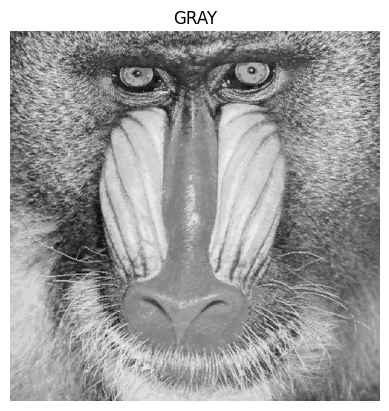

In [5]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)            # Se pasa la imagen a gris para realizar la tarea

    # Se muestran las dos fotos 
    plt.figure()                               
    plt.axis("off")                                         
    plt.title('GRAY')
    plt.imshow(gris, cmap='gray')                           
else: 
    print('Imagen no encontrada')

Función para calcular cuantos pixeles blancos hay por fila y columna en una foto. 

In [16]:
def countWhitePixels(matrix):    
    #Ejercicio resuelto con bucles
    row_white_pixel = [0] * len(matrix)             # Lista que almacena la cuenta de los pixeles blancos por cada fila
    column_white_pixel = [0] * len(matrix[0])       # Lista que almacena la cuenta de los pixeles blancos por cada columna

    for i in range(len(matrix)):                    # Recorre la mátriz y cuenta los pixeles blancos que hay en cada fila y columna
        for j in range(len(matrix[i])):
            if matrix[i][j] == 255:
                row_white_pixel[i]+=1
                column_white_pixel[j]+=1

    return [row_white_pixel, column_white_pixel]

Función para calcular el número de píxeles blancos mayor o igual que un porcentaje*máximo de pixeles blancos en una fila.

In [ ]:
# Recorre los valores de pixeles blancos en una cada fila 
# y calcula cuantas filas superan o igualan 0.95*máximo de pixeles blancos en una fila

def rowsWithHigherPixelCountThanPercentageofMax(rows, percentage):
    num_pixel95 = 0                                 
    for i in rows:                               
        if (i >= (max(rows)*percentage)):
            num_pixel95 += 1
    return num_pixel95


Calcula el máximo de pixeles blancos por columna y fila para los dos métodos de detección de bordes: Canny y Sobel. También determina las filas y columnas por encima del 0.95*máximo.

-----CANNY-----
Número máximo en filas: 220
Número máximo en columnas: 187
Numero de filas con un número de píxeles blancos mayor o igual que 0.95*máximo: 2
-----SOBEL-----
Número máximo en filas: 39
Número máximo en columnas: 38
Numero de filas con un número de píxeles blancos mayor o igual que 0.95*máximo: 2


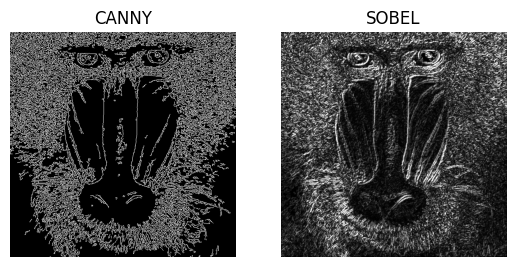

In [19]:
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)                   # Obtiene contornos con el operador de Canny


ggris = cv2.GaussianBlur(gris, (3, 3), 0)           # Gaussiana para suavizar la imagen original, eliminando altas frecuencias

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

sobel = cv2.add(sobelx, sobely)                     # Combina ambos resultados

sobel_abs = cv2.convertScaleAbs(sobel)              # Le aplica el valor absoluto


# Calcula el máximo de pixeles blancos por columna y fila para los dos métodos de detección de bordes

print("-----CANNY-----")
print("Número máximo en filas:", max(countWhitePixels(canny)[0]))
print("Número máximo en columnas:", max(countWhitePixels(canny)[1]))
print("Numero de filas con un número de píxeles blancos mayor o igual que 0.95*máximo:", rowsWithHigherPixelCountThanPercentageofMax(countWhitePixels(canny)[0], 0.95))
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title('CANNY')

plt.imshow(canny, cmap='gray') 

print("-----SOBEL-----")
print("Número máximo en filas:", max(countWhitePixels(sobel_abs)[0]))
print("Número máximo en columnas:", max(countWhitePixels(sobel_abs)[1]))
print("Numero de filas con un número de píxeles blancos mayor o igual que 0.95*máximo:", rowsWithHigherPixelCountThanPercentageofMax(countWhitePixels(sobel_abs)[0], 0.95))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('SOBEL')
plt.imshow(sobel_abs, cmap='gray') 
plt.show()


Comparación de los resultados obtenidos a partir de Sobel y Canny

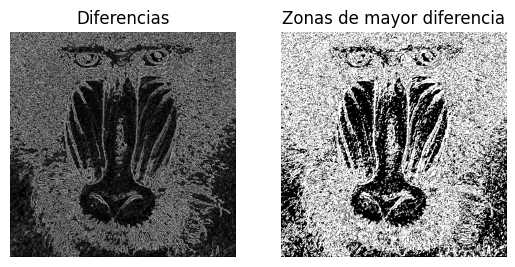

In [21]:
dif = cv2.absdiff(canny, sobel_abs)         # Calcula la diferencia absoluta entre dos imágenes

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Zonas de mayor diferencia")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Aplica un filtro Sobel sobre la webcam


In [11]:
def showBorders(frame):
    newFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    newFrame = cv2.GaussianBlur(newFrame, (3, 3), 0)
    sobelx = cv2.Sobel(newFrame, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(newFrame, cv2.CV_64F, 0, 1)
    newFrame = cv2.add(sobelx, sobely)
    return newFrame

vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        cv2.imshow('Sobel', showBorders(frame))
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Aplica un filtro Canny sobre la webcam

In [9]:
def showBorders(frame):
    newFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    newFrame = cv2.GaussianBlur(newFrame, (3, 3), 0)
    newFrame = cv2.Canny(newFrame, 100, 200)
    return newFrame

vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        cv2.imshow('Canny', showBorders(frame))
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Aplica un filtro en el que se divide la imagen de la webcam en 4 y se habilita solo un canal de color en cada division. Rojo, azul, verde y grises

In [8]:
# Función para crear una máscara cuadrada
def create_square_mask(height, width, vertx1, vertx2, vertx3, vertx4):
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([vertx1, vertx2, vertx3, vertx4], np.int32)
    cv2.fillConvexPoly(mask, pts, 255)
    return mask

# Función para aplicar sobre una mascará un cambio a un canal de color
def apply_square_mask(image, mask, channel, value):
    image[:, :, channel] = np.where(mask == 255, value, image[:, :, channel])

# Función para aplicar el filtro gris
def apply_grayscale_mask(image, mask):
    gray_value = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    for channel in range(3):
        image[:, :, channel] = np.where(mask == 255, gray_value, image[:, :, channel])

# Iniciar la captura de vídeo
vid = cv2.VideoCapture(0)

# Leer el primer fotograma para obtener las dimensiones
frame = vid.read()[1]
height, width = frame.shape[0], frame.shape[1]

# Crear las máscaras para los cuatro cuadrantes
square_mask1 = create_square_mask(height, width, [0, 0], [width // 2, 0], [width // 2, height // 2], [0, height // 2])
square_mask2 = create_square_mask(height, width, [width // 2, 0], [width, 0], [width, height // 2], [width // 2, height // 2])
square_mask3 = create_square_mask(height, width, [0, height // 2], [width // 2, height // 2], [width // 2, height], [0, height])
square_mask4 = create_square_mask(height, width, [width // 2, height // 2], [width, height // 2], [width, height], [width // 2, height])

# Bucle para procesar cada fotograma
while(True):      
    # Leer fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplicar las máscaras a los diferentes cuadrantes y canales
        
        # En el cuadrante superior izquierdo solo deja el canal azul  
        apply_square_mask(frame, square_mask1, 1, 0)
        apply_square_mask(frame, square_mask1, 2, 0)
        
        # En el cuadrante superior derecho solo deja el canal verde  
        apply_square_mask(frame, square_mask2, 0, 0)
        apply_square_mask(frame, square_mask2, 2, 0)
        
        # En el cuadrante inferior izquierdo solo deja el canal rojo
        apply_square_mask(frame, square_mask3, 0, 0)  
        apply_square_mask(frame, square_mask3, 1, 0)  
        
        # En el cuadrante inferior derecho se pone un filtro en gris
        apply_grayscale_mask(frame, square_mask4) # gris

        # Mostrar el fotograma modificado
        cv2.imshow('Colors', frame)
    
    # Detener el bucle con la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar la captura de vídeo y cerrar ventanas
vid.release()
cv2.destroyAllWindows()


Detecta el naranja del rotulador y pinta una traza de azul sobre la imagen

In [7]:
#codigo para mostrar bordes con sobel (nuestro favorito)
def showBorders(frame, mask_total):
    imghsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)     # Convierte el fotograma de BGR a RGB.
    
    # Máscara donde los píxeles en el rango rojo especificado son blancos (255) y los demás son negros (0).
    mask = cv2.inRange(imghsv, (5, 150, 130), (12, 255, 255))
    
    # Actualiza la máscara acumulada combinando la máscara del fotograma actual
    mask_total = cv2.bitwise_or(mask, mask_total)
    
    # Inverso de la máscara acumulada, que selecciona las zonas que no están en el rango de color rojo.
    mask_inv = cv2.bitwise_not(mask_total)
    
    # se conserva el contenido de los píxeles fuera de las zonas rojas 
    frame_masked = cv2.bitwise_and(frame, frame, mask=mask_inv)
    
    # Aplica la máscara a la imagen azul
    blue_masked = cv2.bitwise_and(blue_image, blue_image, mask=mask_total)
    
    # Suma las partes enmascaradas del fotograma original y las zonas azuladas.
    newFrame = cv2.add(blue_masked, frame_masked)
    return newFrame, mask_total

vid = cv2.VideoCapture(0)
frame = vid.read()[1] 

height, width, _ = frame.shape

# Se crea una máscara vacía
mask_total = np.zeros((height, width), dtype=np.uint8)
# Se crea una imagen azul
blue_image = np.full((height, width, 3), (70, 191, 253), dtype=np.uint8)
blue_image = cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB)
 
# Para guardar el video
"""output_filename = "./videos/apartado7.avi"
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec para el video (XVID es común)
fps = 20.0
video_writer = cv2.VideoWriter(output_filename, fourcc, fps, (width, height))
"""

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        frame, mask_total = showBorders(frame, mask_total)
        cv2.imshow('DisneyChannel', cv2.flip(frame, 1))
        # Para guardar el video
        #video_writer.write(frame) 
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Para guardar el video
# video_writer.release()
# Destruye ventanas
cv2.destroyAllWindows()